In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.49275838
Validation score: 0.956112
Iteration 2, loss = 0.11616185
Validation score: 0.970715
Iteration 3, loss = 0.07941389
Validation score: 0.979572
Iteration 4, loss = 0.06318326
Validation score: 0.981248
Iteration 5, loss = 0.05391678
Validation score: 0.982285
Iteration 6, loss = 0.04668958
Validation score: 0.982764
Iteration 7, loss = 0.04210892
Validation score: 0.984759
Iteration 8, loss = 0.03739380
Validation score: 0.984839
Iteration 9, loss = 0.03495419
Validation score: 0.985078
Iteration 10, loss = 0.03176146
Validation score: 0.986195
Iteration 11, loss = 0.02942728
Validation score: 0.985557
Iteration 12, loss = 0.02773998
Validation score: 0.986674
Iteration 13, loss = 0.02569489
Validation score: 0.986993
Iteration 14, loss = 0.02444538
Validation score: 0.987153
Iteration 15, loss = 0.02327424
Validation score: 0.986275
Iteration 16, loss = 0.02203049
Validation score: 0.988509
Iteration 17, loss = 0.02106202
Validation score: 0.987472
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 30, 20),
              max_iter=100, random_state=42, verbose=True)

In [7]:
mlp_predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, mlp_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, mlp_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9866867761516405
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.98      1.00      0.99      7636
     Kannada       0.97      0.97      0.97      6488
   Malayalam       0.99      0.98      0.99      7200
     Marathi       1.00      0.98      0.99      7427
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.98      0.98      0.98      1665

    accuracy                           0.99     53706
   macro avg       0.99      0.99      0.99     53706
weighted avg       0.99      0.99      0.99     53706



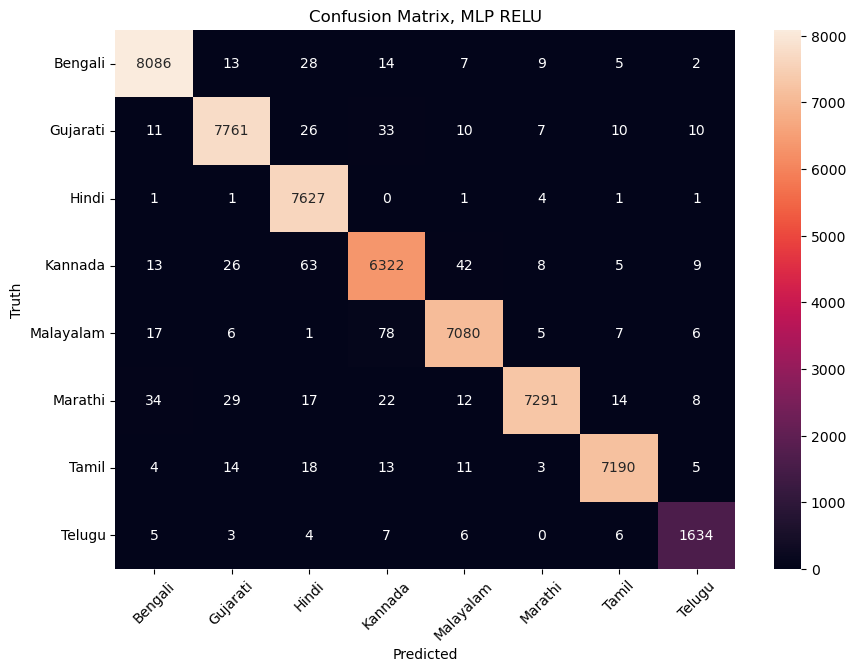

In [11]:
cm = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
num_classes = len(mlp.classes_)
plt.xticks(np.arange(num_classes) + 0.5, mlp.classes_, rotation=45)  # Align with heatmap cells
plt.yticks(np.arange(num_classes) + 0.5, mlp.classes_, rotation=0)
plt.title('Confusion Matrix, MLP RELU')
plt.show()

In [13]:
tan_h = MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
tan_h.fit(X_train, y_train)

Iteration 1, loss = 0.51226671
Validation score: 0.942866
Iteration 2, loss = 0.15703794
Validation score: 0.964172
Iteration 3, loss = 0.09993658
Validation score: 0.975583
Iteration 4, loss = 0.07451364
Validation score: 0.977817
Iteration 5, loss = 0.06137410
Validation score: 0.979971
Iteration 6, loss = 0.05244268
Validation score: 0.982046
Iteration 7, loss = 0.04624793
Validation score: 0.984041
Iteration 8, loss = 0.04129886
Validation score: 0.984280
Iteration 9, loss = 0.03803896
Validation score: 0.985238
Iteration 10, loss = 0.03484013
Validation score: 0.986116
Iteration 11, loss = 0.03305338
Validation score: 0.985796
Iteration 12, loss = 0.03063192
Validation score: 0.986674
Iteration 13, loss = 0.02869458
Validation score: 0.986834
Iteration 14, loss = 0.02763859
Validation score: 0.986914
Iteration 15, loss = 0.02636245
Validation score: 0.987312
Iteration 16, loss = 0.02509736
Validation score: 0.987791
Iteration 17, loss = 0.02430996
Validation score: 0.987392
Iterat

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [14]:
tan_h_predictions = tan_h.predict(X_test)
accuracy = accuracy_score(y_test, tan_h_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, tan_h_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9865378170036867
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.98      1.00      0.99      7636
     Kannada       0.98      0.97      0.98      6488
   Malayalam       0.99      0.98      0.99      7200
     Marathi       0.99      0.99      0.99      7427
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.95      0.98      0.97      1665

    accuracy                           0.99     53706
   macro avg       0.98      0.99      0.98     53706
weighted avg       0.99      0.99      0.99     53706



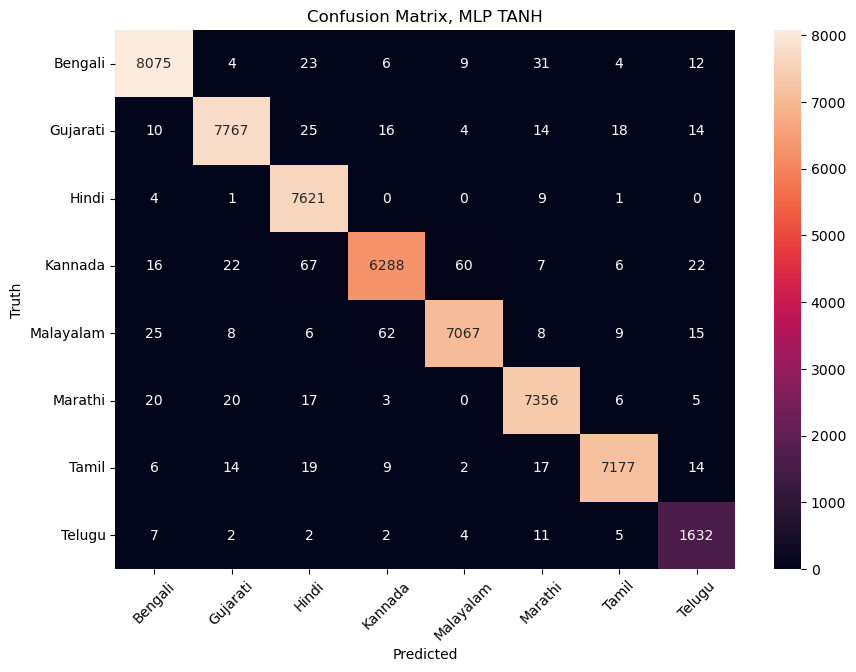

In [20]:
cm = confusion_matrix(y_test, tan_h_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
num_classes = len(tan_h.classes_)
plt.xticks(np.arange(num_classes) + 0.5, tan_h.classes_, rotation=45)
plt.yticks(np.arange(num_classes) + 0.5, tan_h.classes_, rotation=0)
plt.title('Confusion Matrix, MLP TANH')
plt.show()

In [22]:
logistic = MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
logistic.fit(X_train, y_train)

Iteration 1, loss = 1.48593617
Validation score: 0.779285
Iteration 2, loss = 0.65413195
Validation score: 0.887169
Iteration 3, loss = 0.37233172
Validation score: 0.922917
Iteration 4, loss = 0.26200696
Validation score: 0.941270
Iteration 5, loss = 0.20075228
Validation score: 0.949489
Iteration 6, loss = 0.16208491
Validation score: 0.958107
Iteration 7, loss = 0.13652632
Validation score: 0.964491
Iteration 8, loss = 0.11799136
Validation score: 0.968560
Iteration 9, loss = 0.10440920
Validation score: 0.971513
Iteration 10, loss = 0.09334731
Validation score: 0.973907
Iteration 11, loss = 0.08482629
Validation score: 0.974545
Iteration 12, loss = 0.07789666
Validation score: 0.977019
Iteration 13, loss = 0.07242298
Validation score: 0.978774
Iteration 14, loss = 0.06770824
Validation score: 0.978934
Iteration 15, loss = 0.06368575
Validation score: 0.978535
Iteration 16, loss = 0.06065717
Validation score: 0.979094
Iteration 17, loss = 0.05717182
Validation score: 0.979652
Iterat

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [23]:
logistic_predictions = logistic.predict(X_test)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, logistic_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9858302610509068
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.98      0.99      7868
       Hindi       0.98      1.00      0.99      7636
     Kannada       0.98      0.97      0.98      6488
   Malayalam       0.99      0.98      0.98      7200
     Marathi       0.99      0.99      0.99      7427
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.98      0.98      0.98      1665

    accuracy                           0.99     53706
   macro avg       0.98      0.99      0.99     53706
weighted avg       0.99      0.99      0.99     53706



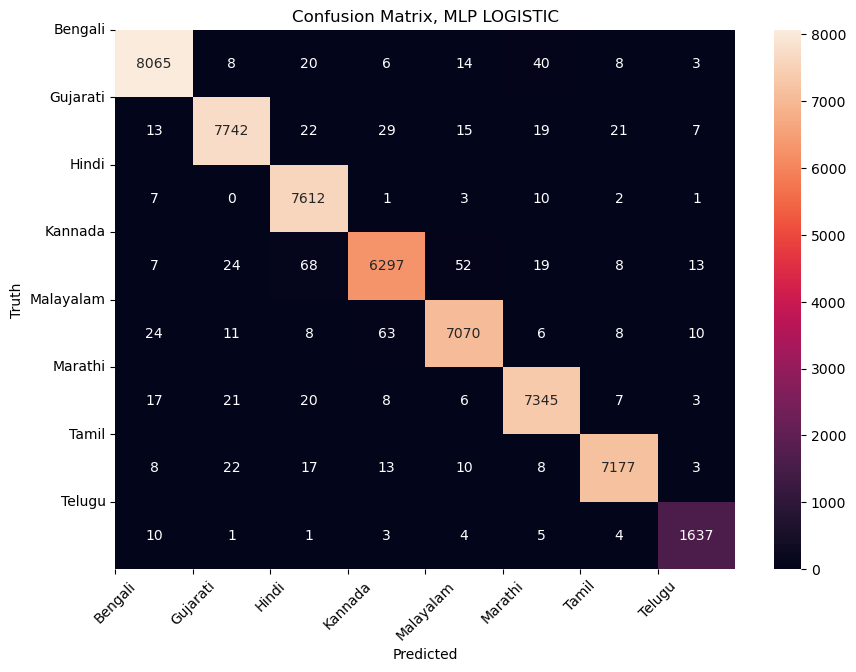

In [26]:
cm = confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
num_classes = len(logistic.classes_)
plt.xticks(np.arange(num_classes), logistic.classes_, rotation=45)
plt.yticks(np.arange(num_classes), logistic.classes_, rotation=0)  
plt.title('Confusion Matrix, MLP LOGISTIC')

plt.show()

In [28]:
identity = MLPClassifier(activation='identity', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
identity.fit(X_train, y_train)

Iteration 1, loss = 0.49378561
Validation score: 0.918449
Iteration 2, loss = 0.28624808
Validation score: 0.922040
Iteration 3, loss = 0.27351559
Validation score: 0.924753
Iteration 4, loss = 0.26746621
Validation score: 0.924992
Iteration 5, loss = 0.26411100
Validation score: 0.927466
Iteration 6, loss = 0.26146518
Validation score: 0.927785
Iteration 7, loss = 0.25941931
Validation score: 0.925630
Iteration 8, loss = 0.25830422
Validation score: 0.928902
Iteration 9, loss = 0.25623303
Validation score: 0.928902
Iteration 10, loss = 0.25588063
Validation score: 0.928264
Iteration 11, loss = 0.25565633
Validation score: 0.928264
Iteration 12, loss = 0.25474969
Validation score: 0.924912
Iteration 13, loss = 0.25379364
Validation score: 0.926189
Iteration 14, loss = 0.25338350
Validation score: 0.927306
Iteration 15, loss = 0.25429872
Validation score: 0.928583
Iteration 16, loss = 0.25280425
Validation score: 0.930259
Iteration 17, loss = 0.25245765
Validation score: 0.928024
Iterat

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [29]:
identity_predictions = identity.predict(X_test)
accuracy = accuracy_score(y_test, identity_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, identity_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9303057386511749
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.93      0.92      0.93      8164
    Gujarati       0.95      0.95      0.95      7868
       Hindi       0.96      0.96      0.96      7636
     Kannada       0.93      0.92      0.92      6488
   Malayalam       0.93      0.94      0.94      7200
     Marathi       0.87      0.91      0.89      7427
       Tamil       0.95      0.94      0.95      7258
      Telugu       0.88      0.77      0.82      1665

    accuracy                           0.93     53706
   macro avg       0.93      0.91      0.92     53706
weighted avg       0.93      0.93      0.93     53706



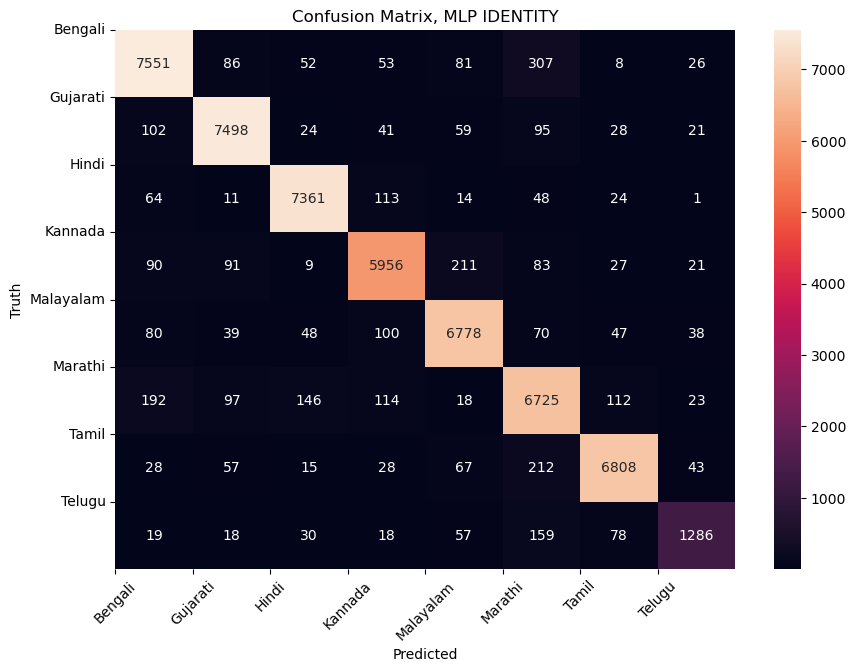

In [32]:
cm = confusion_matrix(y_test, identity_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
num_classes = len(identity.classes_)
plt.xticks(np.arange(num_classes), identity.classes_, rotation=45)
plt.yticks(np.arange(num_classes), identity.classes_, rotation=0)
plt.title('Confusion Matrix, MLP IDENTITY')

plt.show()

In [34]:
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

In [36]:
model = Sequential()
model.add(Dense(134, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(268, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(134, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 4s 972us/step - accuracy: 0.8734 - loss: 0.4119 - val_accuracy: 0.9806 - val_loss: 0.0643
Epoch 2/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.9699 - loss: 0.1003 - val_accuracy: 0.9848 - val_loss: 0.0484
Epoch 3/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 4s 978us/step - accuracy: 0.9773 - loss: 0.0736 - val_accuracy: 0.9870 - val_loss: 0.0421
Epoch 4/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step - accuracy: 0.9795 - loss: 0.0665 - val_accuracy: 0.9877 - val_loss: 0.0419
Epoch 5/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 4s 900us/step - accuracy: 0.9810 - loss: 0.0623 - val_accuracy: 0.9875 - val_loss: 0.0375
Epoch 6/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 3s 865us/step - accuracy: 0.9819 - loss: 0.0593 - val_accuracy: 0.9890 - val_loss: 0.0355
Epoch 7/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 4s 925us/step - accuracy: 0.9830 - loss: 0.0580 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 8/50
3916/3916 ━━━━━━━━━━━━━━━━━━━━ 4s 947us/step - accuracy: 0.9835 -

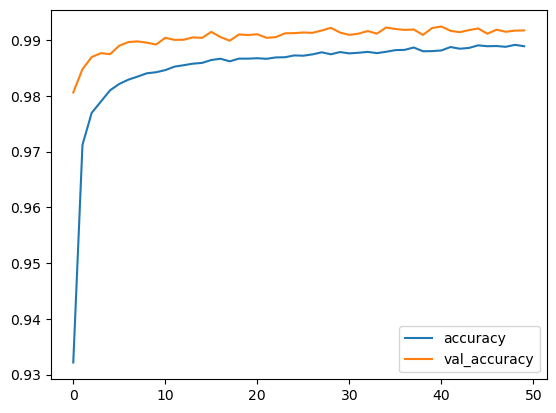

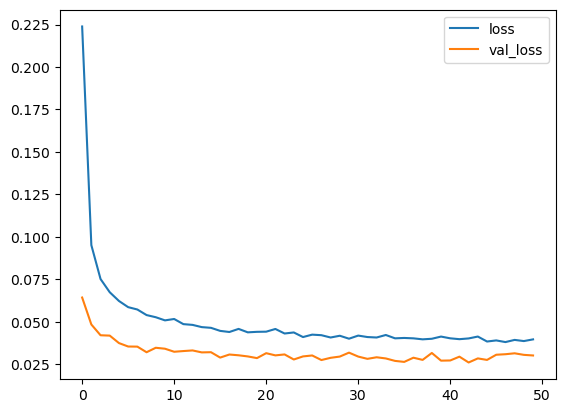

In [39]:
history_df = pd.DataFrame(history.history)

history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

history_df[['loss', 'val_loss']].plot()
plt.show()

In [40]:
model.evaluate(X_test, y_test)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9914 - loss: 0.0313


[0.030186070129275322, 0.9917513728141785]

In [41]:
y_pred = model.predict(X_test)
y_pred = [y.argmax() for y in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

1679/1679 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
Accuracy: 0.9917513871820653
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8164
           1       1.00      0.99      0.99      7868
           2       0.97      1.00      0.99      7636
           3       0.98      0.98      0.98      6488
           4       1.00      0.99      0.99      7200
           5       1.00      0.99      1.00      7427
           6       1.00      0.99      1.00      7258
           7       1.00      0.99      0.99      1665

    accuracy                           0.99     53706
   macro avg       0.99      0.99      0.99     53706
weighted avg       0.99      0.99      0.99     53706



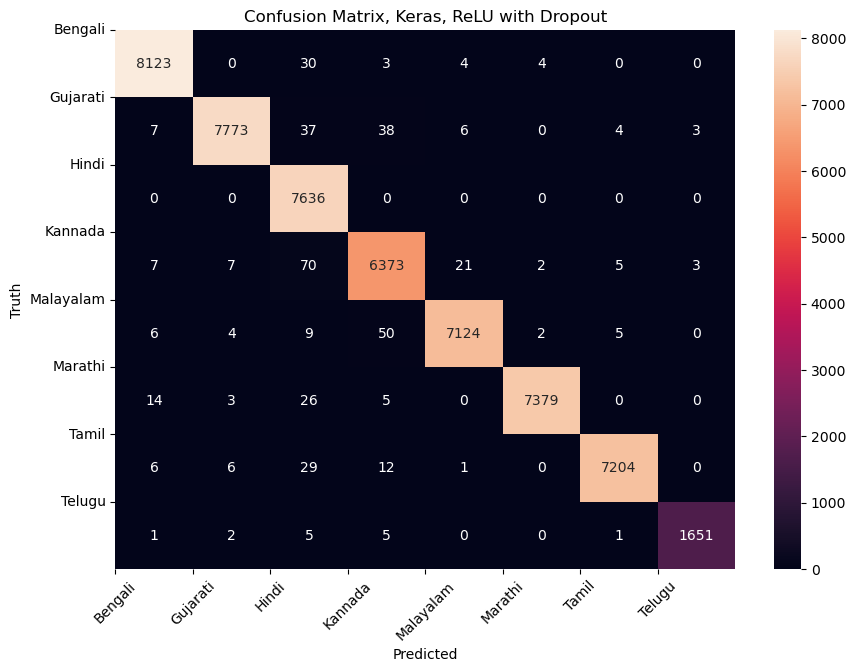

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
num_classes = len(labelEncoder.classes_)
plt.xticks(np.arange(num_classes), labelEncoder.classes_, rotation=45)
plt.yticks(np.arange(num_classes), labelEncoder.classes_, rotation=0)
plt.title('Confusion Matrix, Keras, ReLU with Dropout')
plt.show()

In [43]:
with open('models/keras_mlp_relu_dropout.pkl', 'wb') as f:
    pickle.dump(model, f)